## Optimization via Gradient Descent ##

### Write a script that implement the GD algorithm ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification

def GD(f,grad_f,x0, tolf, tolx, kmax):

    xact = x0
    xprev = x0 + tolx + 1
    k=0
    x_val = x0
    f_val = f(xact)
    err_val = grad_f(xact)
    norm_g = np.array([np.linalg.norm(err_val[-len(x0):])])
    
    while (np.linalg.norm(xact-xprev) > tolx) and (norm_g[-1] > tolf) and k<kmax:
        alpha = backtracking(f,grad_f,xact)
        xprev = xact
        xact = xact - alpha*grad_f(xact)
        x_val = np.concatenate((x_val,xact))
        f_val = np.concatenate((f_val,f(xact)))
        err_val = np.concatenate((err_val,grad_f(xact)),axis=0)
        k += 1
        norm_g = np.concatenate((norm_g,np.array([np.linalg.norm(err_val[-len(x0):])])))
    err_val = err_val.reshape(len(err_val)//len(x0),len(x0))
    x_val = x_val.reshape(len(x_val)//len(x0),len(x0))
    return xact,x_val,f_val,err_val,k,norm_g

def GD_fixed(f,grad_f,x0, tolf, tolx, kmax,alpha):

    xact = x0
    xprev = x0 + tolx + 1
    k=0
    x_val = x0
    f_val = f(xact)
    err_val = grad_f(xact)
    norm_g = np.array([np.linalg.norm(err_val[-len(x0):])])
    
    while (np.linalg.norm(xact-xprev) > tolx) and (norm_g[-1] > tolf) and k<kmax:
        xprev = xact
        xact = xact - alpha*grad_f(xact)
        x_val = np.concatenate((x_val,xact))
        f_val = np.concatenate((f_val,f(xact)))
        err_val = np.concatenate((err_val,grad_f(xact)),axis=0)
        k += 1
        norm_g = np.concatenate((norm_g,np.array([np.linalg.norm(err_val[-len(x0):])])))
    err_val = err_val.reshape(len(err_val)//len(x0),len(x0))
    x_val = x_val.reshape(len(x_val)//len(x0),len(x0))
    return xact,x_val,f_val,err_val,k,norm_g




def f_prova(x):
    return x**2 + 2*x + 1

def f1(x):
    return np.array([(x[0]-3)**2+(x[1]-1)**2])

def f2(x):
    return np.array([10*(x[0]-1)**2+(x[1]-2)**2])

def f3(x):
    A = np.vander(np.arange(len(x))+1)
    x_true = np.ones((x.shape))
    b = A@x_true
    return np.array([(np.linalg.norm(A@x-b)**2)/2])

def f4(x):
    A = np.vander(np.arange(len(x))+1)
    x_true = np.ones((x.shape))
    b = A@x_true
    lmbda = 0.1
    return np.array([(np.linalg.norm(A@x-b)**2)/2 + (lmbda*np.linalg.norm(x)**2)/2])

def f5(x):
    return x**4+x**3-2*x**2-2*x

def grad_f_prova(x):
    return 2*x + 2

def grad_f1(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])

def grad_f2(x):
    return np.array([20*(x[0]-1), 2*(x[1]-2)])

def grad_f3(x):
    A = np.vander(np.arange(len(x))+1)
    x_true = np.ones(np.shape(x))
    b = A@x_true
    e = A@x-b
    return e.T@A

def grad_f4(x):
    A = np.vander(np.arange(len(x))+1)
    x_true = np.ones(np.shape(x))
    b = A@x_true
    e = A@x-b
    lmbda = 1
    return e.T@A + 2*x

def grad_f5(x):
    return 4*x**3+3*x**2-4*x-2

def backtracking(f,grad_f,x):
    alpha = 0.5
    c = 0.8
    tau = 0.5

    while f(x-alpha*grad_f(x))>f(x) - c*alpha*np.linalg.norm((grad_f(x)))**2:
        alpha = alpha*tau

        if alpha < 1e-3:
            break
    return alpha

def plotting(f,x_val,func,x):
    if len(x)==1:
        x1 = np.linspace(-2,2,21)
        y1 = np.array([f(i) for i in x1])
        plt.plot(x1,y1,'-')
        plt.plot(x_val,func,'o-',c='red')
        plt.title('GD')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid()
        plt.show()

    elif len(x)==2:
        xv = np.linspace(-5,5,7)
        yv = np.linspace(-5,5,7)
        xx,yy = np.meshgrid(xv,yv)
        zz = f(np.concatenate((xx.reshape(1,49),yy.reshape(1,49)),axis=0))
        zz = zz.reshape(7,7)
        plt.contourf(xx,yy,zz)
        plt.plot(x_val[:,0],x_val[:,1],'o-')
        plt.title('Xmin=['+str(x_val[-1,0])+','+str(x_val[-1,1])+']')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid()
        plt.show()

FUNCTION 1: f(x) = (x1-3)^2+(x2-1)^2
xmin: [2.99746017 1.00126992]
iterations k: 27
f(xmin): 8.063447022171904e-06
grad_f(xmin): [-0.00507967  0.00253983]


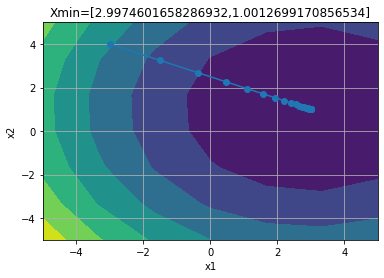

FUNCTION 2: f(x) = 10(x1-1)^2+(x2-2)^2
xmin: [0.99991402 2.00566106]
iterations k: 34
f(xmin): 3.2121574495275e-05
grad_f(xmin): [-0.00171951  0.01132213]


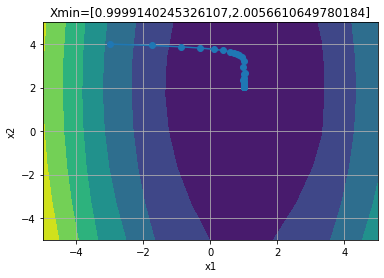

FUNCTION 3: f(x) = 1/2 * ||Ax-b||^2
xmin: [0.97915536 1.03356986]
iterations k: 68
f(xmin): 0.00011392807223437095
grad_f(xmin): [-0.00351362  0.0046058 ]
FUNCTION 4: f(x) = 1/2 * ||Ax-b||^2 + L/2 * ||x||^2
xmin: [0.58762007 1.02448401]
iterations k: 100
f(xmin): 0.46519559346977046
grad_f(xmin): [-0.81320752  0.86079622]


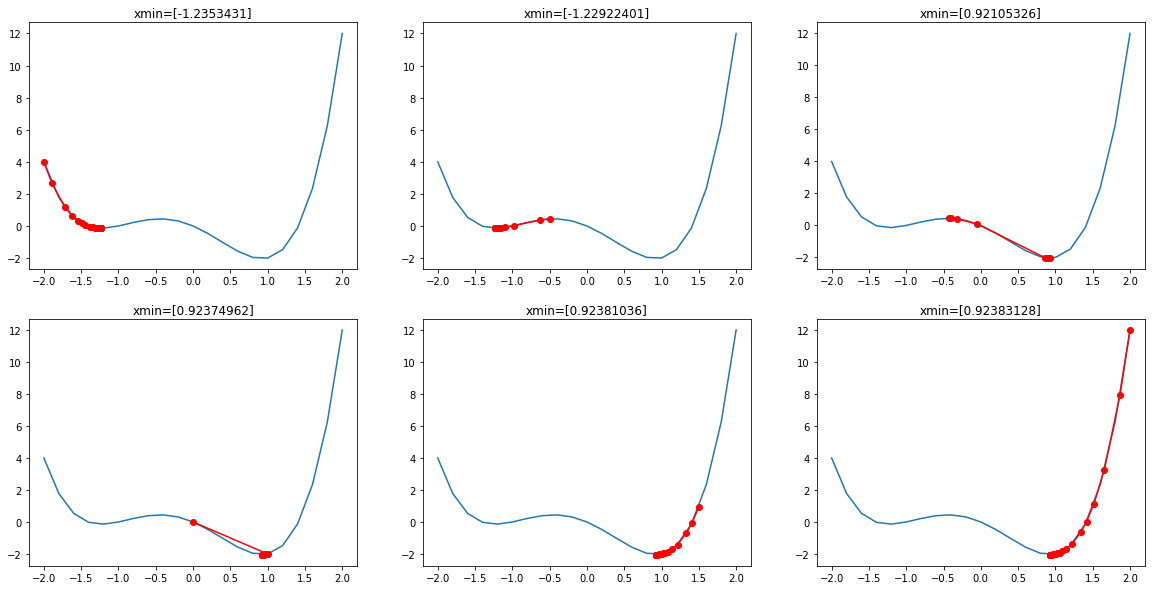

FUNCTION 5: f(x) = x^4 + x^3 - 2x^2 - 2x


In [2]:
x,x_val,func,g,k,norm_g = GD(f1, grad_f1,np.array([-3,4]),0.001,0.001,100)
print('FUNCTION 1: f(x) = (x1-3)^2+(x2-1)^2')
print('xmin:',x)
print('iterations k:',k)
print('f(xmin):',func[-1])
print('grad_f(xmin):',g[-1])

plotting(f1,x_val,func,x)

x,x_val,func,g,k,norm_g = GD(f2, grad_f2,np.array([-3,4]),0.001,0.001,100)
print('FUNCTION 2: f(x) = 10(x1-1)^2+(x2-2)^2')
print('xmin:',x)
print('iterations k:',k)
print('f(xmin):',func[-1])
print('grad_f(xmin):',g[-1])

plotting(f2,x_val,func,x)

x,x_val,func,g,k,norm_g = GD(f3, grad_f3,np.array([-0.5,1]),0.001,0.001,100)
print('FUNCTION 3: f(x) = 1/2 * ||Ax-b||^2')
print('xmin:',x)
print('iterations k:',k)
print('f(xmin):',func[-1])
print('grad_f(xmin):',g[-1])

#plotting(f3,x_val,func,x)

x,x_val,func,g,k,norm_g = GD(f4, grad_f4,np.array([-0.5,1]),0.001,0.001,100)
print('FUNCTION 4: f(x) = 1/2 * ||Ax-b||^2 + L/2 * ||x||^2')
print('xmin:',x)
print('iterations k:',k)
print('f(xmin):',func[-1])
print('grad_f(xmin):',g[-1])

#plotting(f4,x_val,func,x)

samples = [-2.0, -0.5, -0.4281, 0, 1.5, 2]
plt.figure(figsize=(20,10))
for i in range(6):
    x,x_val,func,g,k,norm_g = GD(f5, grad_f5,np.array([samples[i]]),0.001,0.001,100)
    plt.subplot(2,3,i+1)
    x1=np.linspace(-2,2,21)
    plt.plot(x1,np.array([f5(i) for i in x1]))
    plt.title('xmin='+str(x))
    plt.plot(x_val,func,'o-',c='red')
plt.show()
print('FUNCTION 5: f(x) = x^4 + x^3 - 2x^2 - 2x')



### For each of the functions above, run the GD method with and without the backtracking, trying different values for the step size alpha > 0 when you are not using backtracking. Observe the different behavior of GD ###

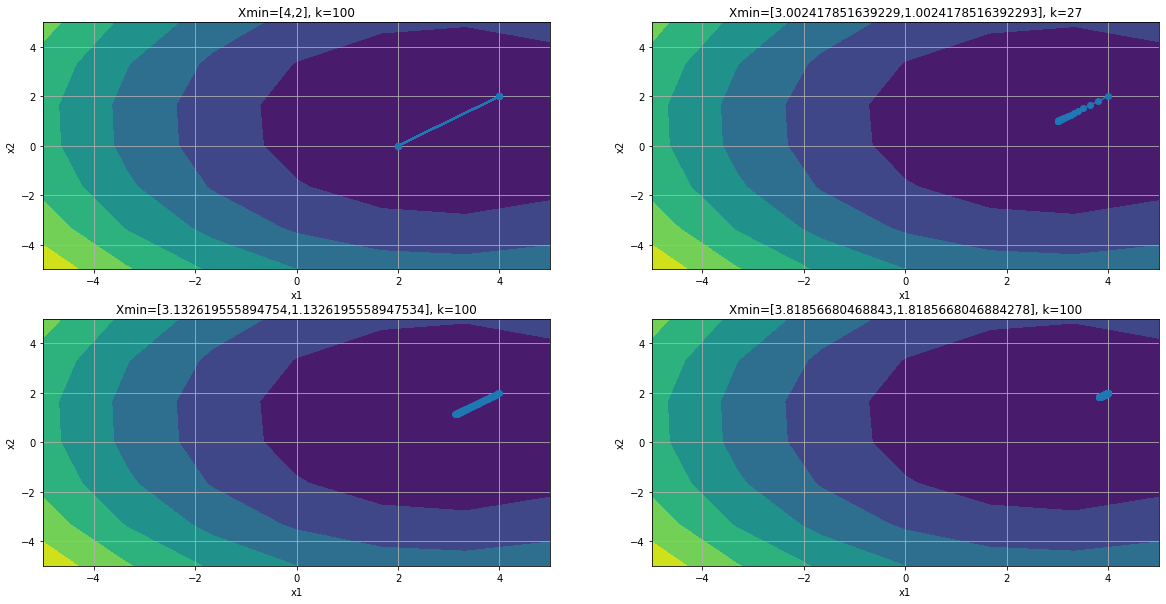

FUNCTION 1: f(x) = (x1-3)^2+(x2-1)^2


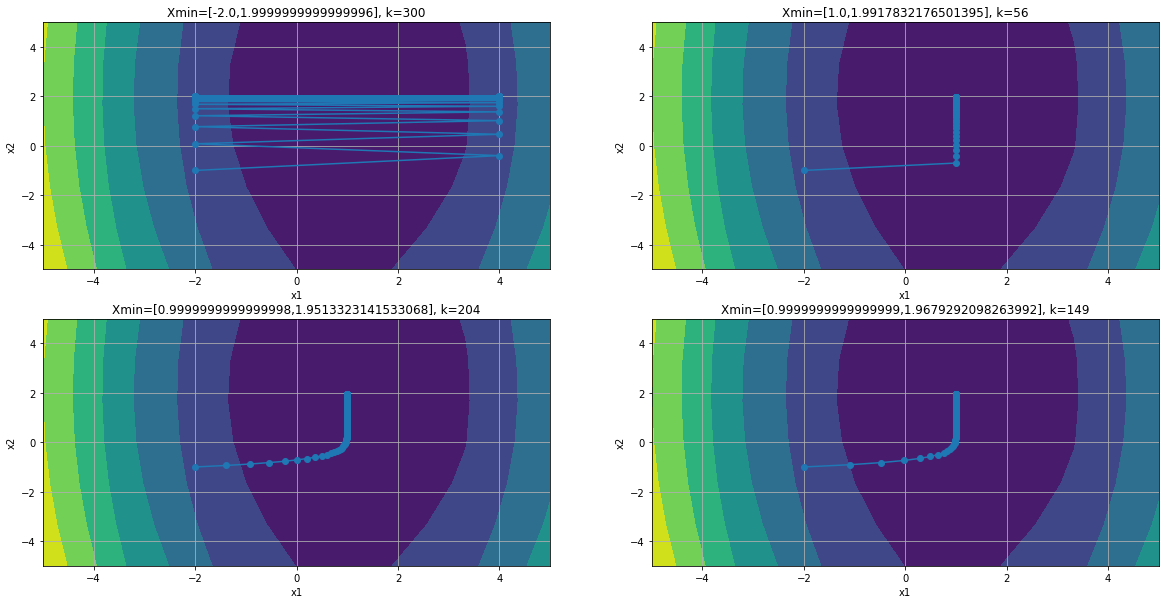

FUNCTION 2: f(x) = 10(x1-1)^2+(x2-2)^2


In [36]:
alpha_sample = [1, 0.1, 0.01, 0.001]

plt.figure(figsize=(20,10))
xv = np.linspace(-5,5,7)
yv = np.linspace(-5,5,7)
xx,yy = np.meshgrid(xv,yv)
zz = f1(np.concatenate((xx.reshape(1,49),yy.reshape(1,49)),axis=0))
zz = zz.reshape(7,7)
for i in range(4):
    x,x_val,func,g,k,norm_g = GD_fixed(f1,grad_f1,np.array([4,2]), 0.001, 0.001, 100, alpha_sample[i])
    plt.subplot(2,2,i+1)
    plt.contourf(xx,yy,zz)
    plt.plot(x_val[:,0],x_val[:,1],'o-')
    plt.title('Xmin=['+str(x_val[-1,0])+','+str(x_val[-1,1])+'], k='+str(k))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid()
plt.show()
print('FUNCTION 1: f(x) = (x1-3)^2+(x2-1)^2')

alpha_sample = [0.1, 0.05, 0.01, 0.015]

plt.figure(figsize=(20,10))
zz = f2(np.concatenate((xx.reshape(1,49),yy.reshape(1,49)),axis=0))
zz = zz.reshape(7,7)
for i in range(4):
    x,x_val,func,g,k,norm_g = GD_fixed(f2,grad_f2,np.array([-2,-1]), 0.001, 0.001, 300, alpha_sample[i])
    plt.subplot(2,2,i+1)
    plt.contourf(xx,yy,zz)
    plt.plot(x_val[:,0],x_val[:,1],'o-')
    plt.title('Xmin=['+str(x_val[-1,0])+','+str(x_val[-1,1])+'], k='+str(k))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid()
plt.show()
print('FUNCTION 2: f(x) = 10(x1-1)^2+(x2-2)^2')

### To help visualization, it is convenient to plot the error vector that contains the ||grad_f(xk)||, to check that it goes to zero. Compare the convergence speed (in terms of the number of iterations k) in the different cases ###

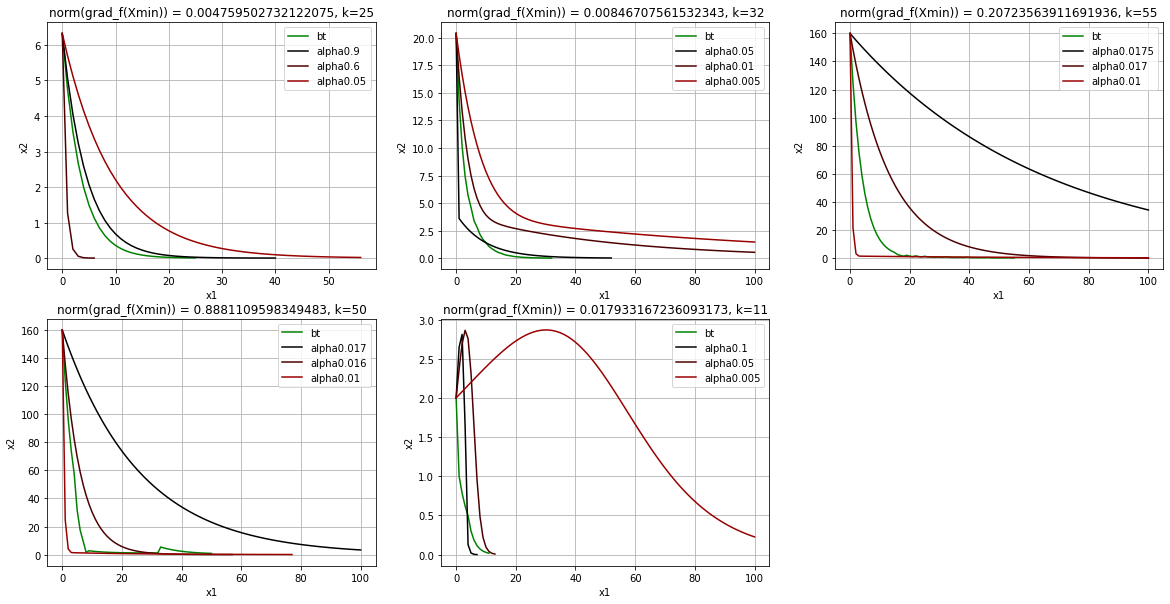

In [32]:

plt.figure(figsize=(20,10))

x,x_val1,func,g,k1,norm_g = GD(f1,grad_f1,np.array([0,0]), 0.001, 0.001, 100)
plt.subplot(2,3,1)
plt.plot(np.arange(0,k1+1),np.linalg.norm(g,axis=1),'-',c='green',label='bt')
plt.title('norm(grad_f(Xmin)) = '+str(np.linalg.norm(g,axis=1)[-1])+', k='+str(k1))
plt.xlabel('x1')
plt.ylabel('x2')
a_sample=[0.9,0.6,0.05]
for i in range(len(a_sample)):
    x,x_val,func,g,k,norm_g = GD_fixed(f1,grad_f1,np.array([0,0]), 0.001,0.001,100,alpha=a_sample[i])
    plt.plot(np.arange(0,k+1),np.linalg.norm(g,axis=1),'-',c=(i*0.3,0,0,1),label='alpha'+str(a_sample[i]))
plt.legend()
plt.grid()

x,x_val2,func,g,k2,norm_g = GD(f2,grad_f2,np.array([0,0]), 0.001, 0.001, 100)
plt.subplot(2,3,2)
plt.plot(np.arange(0,k2+1),np.linalg.norm(g,axis=1),'-',c='green',label='bt')
plt.title('norm(grad_f(Xmin)) = '+str(np.linalg.norm(g,axis=1)[-1])+', k='+str(k2))
plt.xlabel('x1')
plt.ylabel('x2')
a_sample=[0.05,0.01,0.005]
for i in range(len(a_sample)):
    x,x_val,func,g,k,norm_g = GD_fixed(f2,grad_f2,np.array([0,0]), 0.001,0.001,100,alpha=a_sample[i])
    plt.plot(np.arange(0,k+1),np.linalg.norm(g,axis=1),'-',c=(i*0.3,0,0,1),label='alpha'+str(a_sample[i]))
plt.legend()
plt.grid()

x,x_val3,func,g,k3,norm_g = GD(f3,grad_f3,np.array([0,0,0]), 0.001, 0.001, 100)
plt.subplot(2,3,3)
plt.plot(np.arange(0,k3+1),np.linalg.norm(g,axis=1),'-',c='green',label='bt')
plt.title('norm(grad_f(Xmin)) = '+str(np.linalg.norm(g,axis=1)[-1])+', k='+str(k3))
plt.xlabel('x1')
plt.ylabel('x2')
a_sample=[0.0175,0.017,0.01]
for i in range(len(a_sample)):
    x,x_val,func,g,k,norm_g = GD_fixed(f3,grad_f3,np.array([0,0,0]), 0.001,0.001,100,alpha=a_sample[i])
    plt.plot(np.arange(0,k+1),np.linalg.norm(g,axis=1),'-',c=(i*0.3,0,0,1),label='alpha'+str(a_sample[i]))
plt.legend()
plt.grid()

x,x_val4,func,g,k4,norm_g = GD(f4,grad_f4,np.array([0,0,0]), 0.001, 0.001, 100)
plt.subplot(2,3,4)
plt.plot(np.arange(0,k4+1),np.linalg.norm(g,axis=1),'-',c='green',label='bt')
plt.title('norm(grad_f(Xmin)) = '+str(np.linalg.norm(g,axis=1)[-1])+', k='+str(k4))
plt.xlabel('x1')
plt.ylabel('x2')
a_sample=[0.017,0.016,0.01]
for i in range(len(a_sample)):
    x,x_val,func,g,k,norm_g = GD_fixed(f4,grad_f4,np.array([0,0,0]), 0.001,0.001,100,alpha=a_sample[i])
    plt.plot(np.arange(0,k+1),np.linalg.norm(g,axis=1),'-',c=(i*0.3,0,0,1),label='alpha'+str(a_sample[i]))
plt.legend()
plt.grid()

x,x_val5,func,g,k5,norm_g = GD(f5,grad_f5,np.array([0]), 0.001, 0.001, 100)
plt.subplot(2,3,5)
plt.plot(np.arange(0,k5+1),np.linalg.norm(g,axis=1),'-',c='green',label='bt')
plt.title('norm(grad_f(Xmin)) = '+str(np.linalg.norm(g,axis=1)[-1])+', k='+str(k5))
plt.xlabel('x1')
plt.ylabel('x2')
a_sample=[0.1,0.05,0.005]
for i in range(len(a_sample)):
    x,x_val,func,g,k,norm_g = GD_fixed(f5,grad_f5,np.array([0]), 0.001,0.001,100,alpha=a_sample[i])
    plt.plot(np.arange(0,k+1),np.linalg.norm(g,axis=1),'-',c=(i*0.3,0,0,1),label='alpha'+str(a_sample[i]))
plt.legend()
plt.grid()

plt.show()


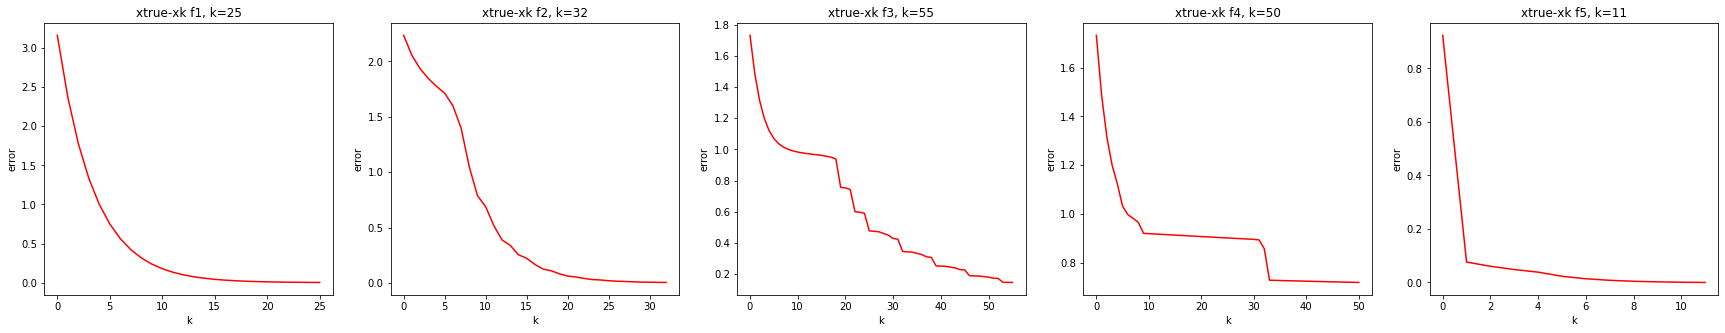

In [45]:
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
plt.plot(np.arange(0,k1+1),np.linalg.norm(x_val1-np.array([[3,1]]),axis=1),c='red')
plt.title('xtrue-xk f1, k='+str(k1))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,2)
plt.plot(np.arange(0,k2+1),np.linalg.norm(x_val2-np.array([[1,2]]),axis=1),c='red')
plt.title('xtrue-xk f2, k='+str(k2))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,3)
plt.plot(np.arange(0,k3+1),np.linalg.norm(x_val3-np.ones((3,)),axis=1),c='red')
plt.title('xtrue-xk f3, k='+str(k3))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,4)
plt.plot(np.arange(0,k4+1),np.linalg.norm(x_val4-np.ones((3,)),axis=1),c='red')
plt.title('xtrue-xk f4, k='+str(k4))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,5)
plt.plot(np.arange(0,k5+1),np.linalg.norm(x_val5-np.array([0.9238]),axis=1),c='red')
plt.title('xtrue-xk f5, k='+str(k5))
plt.xlabel('k')
plt.ylabel('error')
plt.show()

[2.99774237 0.99924746]
[0.99996392 1.99578186]
[1.02379668 0.99509754 0.85652764]
[1.19905488 0.64556763 0.40595978]
[0.92374962]


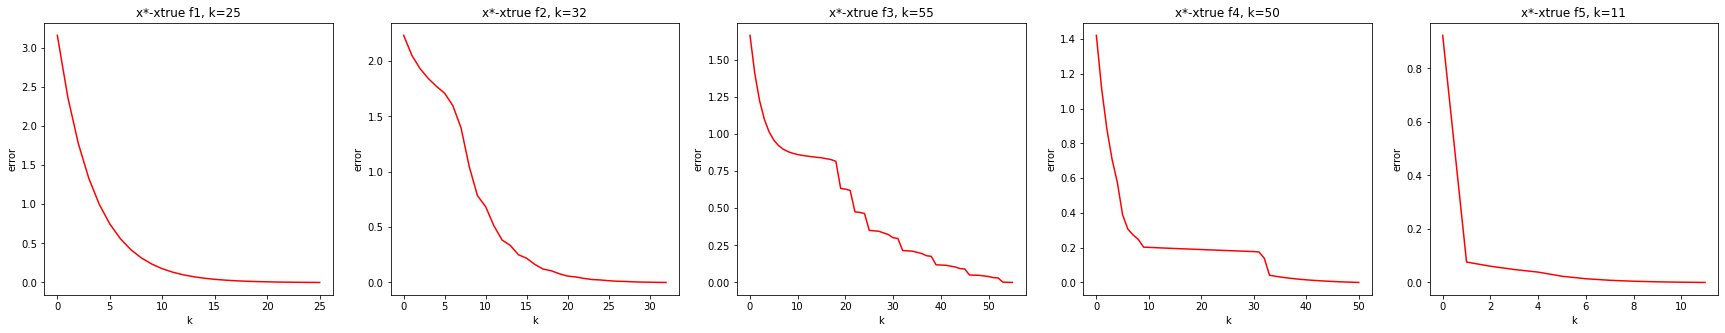

In [44]:
print(x_val1[-1])
print(x_val2[-1])
print(x_val3[-1])
print(x_val4[-1])
print(x_val5[-1])
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
plt.plot(np.arange(0,k1+1),np.linalg.norm(x_val1[-1]-x_val1,axis=1),c='red')
plt.title('x*-xtrue f1, k='+str(k1))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,2)
plt.plot(np.arange(0,k2+1),np.linalg.norm(x_val2[-1]-x_val2,axis=1),c='red')
plt.title('x*-xtrue f2, k='+str(k2))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,3)
plt.plot(np.arange(0,k3+1),np.linalg.norm(x_val3[-1]-x_val3,axis=1),c='red')
plt.title('x*-xtrue f3, k='+str(k3))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,4)
plt.plot(np.arange(0,k4+1),np.linalg.norm(x_val4[-1]-x_val4,axis=1),c='red')
plt.title('x*-xtrue f4, k='+str(k4))
plt.xlabel('k')
plt.ylabel('error')
plt.subplot(1,5,5)
plt.plot(np.arange(0,k5+1),np.linalg.norm(x_val5[-1]-x_val5,axis=1),c='red')
plt.title('x*-xtrue f5, k='+str(k5))
plt.xlabel('k')
plt.ylabel('error')
plt.show()

## Optimization via Stochastic Gradient Descent ##

### Given a number Nbatch (usually called batch size), randomly extract a subdataset M with |M| = Nbatch from D.
### Write a Python script that implement the SGD algorithm, following the structure you already wrote for GD.


In [5]:
def sigmoid(X,w):
    return 1/(1+np.exp(-X.T@w))
    
def l(w,X,Y):
    d,N=np.shape(X)
    X = np.concatenate((np.ones((1,N)),X),axis=0)
    loss = (np.array(1/N/2*np.sum(np.linalg.norm(sigmoid(X,w)-Y)**2))).reshape(1,)
    return loss

def grad_l(w,X,Y):
    d,N = np.shape(X)
    X = np.concatenate((np.ones((1,N)),X),axis=0)
    d+=1
    g = 1/N*X@(sigmoid(X,w)*(1-sigmoid(X,w))*(sigmoid(X,w)-Y.reshape(N,1)))
    return g

def SGD(l,grad_l,w0,X,Y,batch_size, n_epochs,alpha):

    d,N = np.shape(X)
    w = w0
    w_queue = w
    f_val = l(w,X,Y)
    err = grad_l(w,X,Y)
    n_batch_per_epoch = N//batch_size

    for epoch in range(n_epochs):
        ind = np.arange(N)
        np.random.shuffle(ind)
        for i in range(n_batch_per_epoch):
            try:
                Mx = X[:,ind[(i*batch_size):((1+i)*batch_size)]]
                My = Y[ind[(i*batch_size):((1+i)*batch_size)]]
            except IndexError:
                Mx = X[:,ind[(i*batch_size):]]
                My = Y[ind[(i*batch_size):]]
                
            w = w-alpha*grad_l(w,Mx,My)
            w_queue = np.concatenate((w_queue,w),axis=1)
            
        f_val = np.concatenate((f_val,l(w,X,Y)))
        err = np.concatenate((err,grad_l(w,X,Y)),axis=1)

    return w_queue,f_val,err

### To test the script above, consider the MNIST dataset
### Test the logistic regression classificator for different digits and different training set dimensions.

In [6]:
data = pd.read_csv('data.csv')
data = np.array(data)
X = data[:,1:].T
Y = data[:,0]

def subset(X,Y,s):

    for i in s:
        Xs = X[:,(Y==i)]
        Ys = Y[Y==i]

        try:
            Xsub = np.concatenate((Xsub,Xs),axis=1)
            Ysub = np.concatenate((Ysub,Ys))
        except:
            Xsub = Xs
            Ysub = Ys
    return Xsub,Ysub

def TrainSample(X,Y,N):
    a,b = X.shape
    ind = np.arange(b)
    np.random.shuffle(ind)
    
    Xtrain = X[:,ind[:N]]
    Ytrain = Y[ind[:N]]
    Xtest = X[:,ind[N:]]
    Ytest = Y[ind[N:]]
    return Xtrain,Ytrain,Xtest,Ytest

In [19]:
s = []
s.append(int(input('Write a number')))
s.append(int(input('Write another number')))
Xs,Ys = subset(X,Y,s)
d,N = Xs.shape
Xs,Ys,Xt_s,Yt_s = TrainSample(Xs,Ys,N//200)
Ys = Ys.reshape(Ys.size,1)
Yt_s = Yt_s.reshape(Yt_s.size,1)
d,N = Xs.shape
Y01 = np.zeros(Ys.shape)
Yt_01 = np.zeros(Yt_s.shape)
for i in range(len(Ys)):
    if Ys[i]==s[1]:
        Y01[i]=1

for i in range(len(Yt_s)):
    if Yt_s[i]==s[1]:
        Yt_01[i]=1

    
w = np.ones((d+1,1))*10e-5
w_val,f_val,err = SGD(l,grad_l,w,Xs,Y01,N//10, 30,alpha=1e-4)
w_opt = w_val[:,-1]

In [8]:
def Predict(Xt,w):
    thres = 0.5
    d,N = Xt.shape
    Xt = np.concatenate((np.ones((1,N)),Xt),axis=0)
    f = sigmoid(Xt,w)
    for i in range(N):
        if f[i]<thres:
            f[i]=0
        else:
            f[i]=1
    return f

def Accuracy(Yp,Yt):
    f=0
    for i in range(len(Yp)):
        if Yp[i]==Yt[i]:
            f+=1
    return f/len(Yp)*100


Accuracy: 91.43798024149287 %
Ypredict= [1. 1. 1. ... 0. 1. 0.]


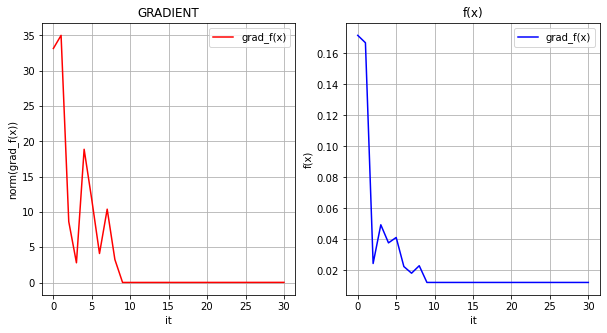

In [20]:
Ypredict = Predict(Xt_s,w_opt)
print('Accuracy:', Accuracy(Ypredict,Yt_01),'%')
print('Ypredict=',Ypredict)
plt.figure(figsize=(10,5))
nor = np.linalg.norm(err,axis=0)
plt.subplot(1,2,1)
plt.plot(np.arange(0,len(nor)),nor,'-',c='red',label='grad_f(x)')
plt.title('GRADIENT')
plt.xlabel('it')
plt.ylabel('norm(grad_f(x))')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0,len(f_val)),f_val,'-',c='blue',label='grad_f(x)')
plt.title('f(x)')
plt.xlabel('it')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

### The training procedure will end up with a set of optimal parameters w*. Compare w* when computed with Gradient Descent and Stochastic Gradient Descent, for different digits and different training set dimensions.

In [51]:
def GD2(X,Y,x0, tolf, tolx, kmax):

    xact = x0
    xprev = x0 + tolx + 1
    k=0
    x_val = x0
    f_val = l(x0,X,Y)
    err_val = grad_l(x0,X,Y)
    norm_g = np.array([np.linalg.norm(err_val[-len(x0):])])
    
    while (np.linalg.norm(xact-xprev) > tolx) and (norm_g[-1] > tolf) and k<kmax:
        alpha = backtracking2(X,Y,xact)
        xprev = xact
        xact = xact - alpha*grad_l(xact,X,Y)
        x_val = np.concatenate((x_val,xact))
        f_val = np.concatenate((f_val,l(xact,X,Y)))
        err_val = np.concatenate((err_val,grad_l(xact,X,Y)),axis=0)
        k += 1
        norm_g = np.concatenate((norm_g,np.array([np.linalg.norm(err_val[-len(x0):])])))
    err_val = err_val.reshape(len(err_val)//len(x0),len(x0))
    x_val = x_val.reshape(len(x_val)//len(x0),len(x0))
    return xact,x_val,f_val,err_val,k,norm_g

def backtracking2(X,Y,x):
    alpha = 0.01
    c = 0.8
    tau = 0.1
    while l(x-alpha*grad_l(x,X,Y),X,Y)>l(x,X,Y) - c*alpha*np.linalg.norm((grad_l(x,X,Y)))**2:
        alpha = alpha*tau

        if alpha < 1e-8:
            break
    return alpha

DIGITS 3 and 4


C:\Users\nagar\AppData\Local\Temp\ipykernel_14480\3525145760.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X.T@w))


Accuracy GD: 98.29059829059828 %
Ypredict= [[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]
Accuracy: 99.6201329534663 %
Ypredict= [1. 1. 1. ... 0. 1. 0.]


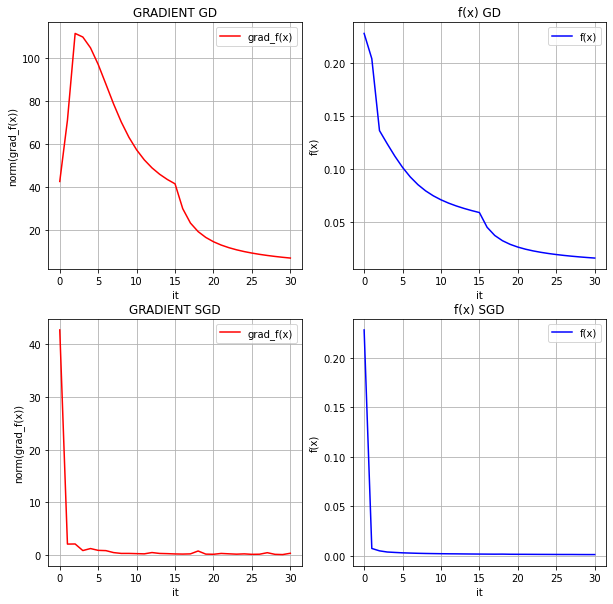

DIGITS 5 and 6


C:\Users\nagar\AppData\Local\Temp\ipykernel_14480\3525145760.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X.T@w))


Accuracy GD: 97.57942511346445 %
Ypredict= [[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
Accuracy: 97.98285426122038 %
Ypredict= [0. 1. 0. ... 1. 0. 0.]


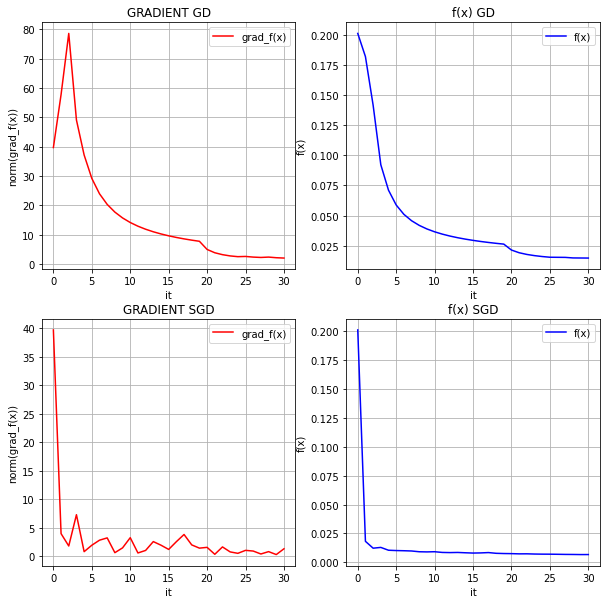

DIGITS 1 and 7


C:\Users\nagar\AppData\Local\Temp\ipykernel_14480\3525145760.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X.T@w))


Accuracy GD: 97.75478758529606 %
Ypredict= [[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
Accuracy: 99.31763152102135 %
Ypredict= [1. 0. 0. ... 1. 1. 0.]


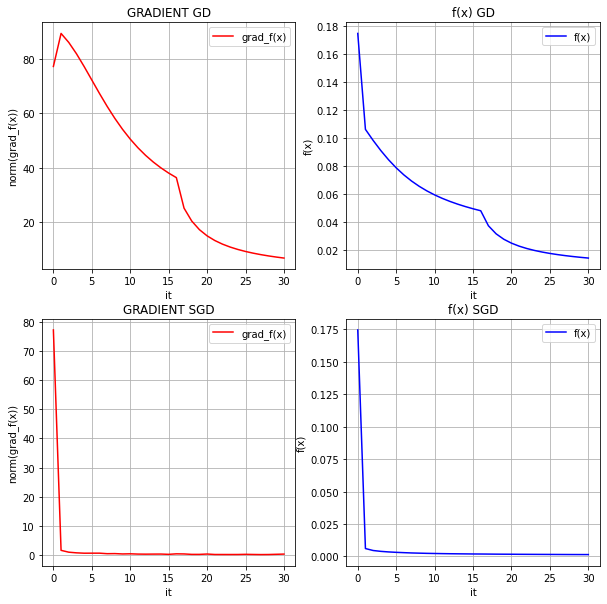

DIGITS 0 and 9


C:\Users\nagar\AppData\Local\Temp\ipykernel_14480\3525145760.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X.T@w))


Accuracy GD: 98.67788461538461 %
Ypredict= [[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
Accuracy: 99.39903846153845 %
Ypredict= [0. 1. 0. ... 1. 0. 1.]


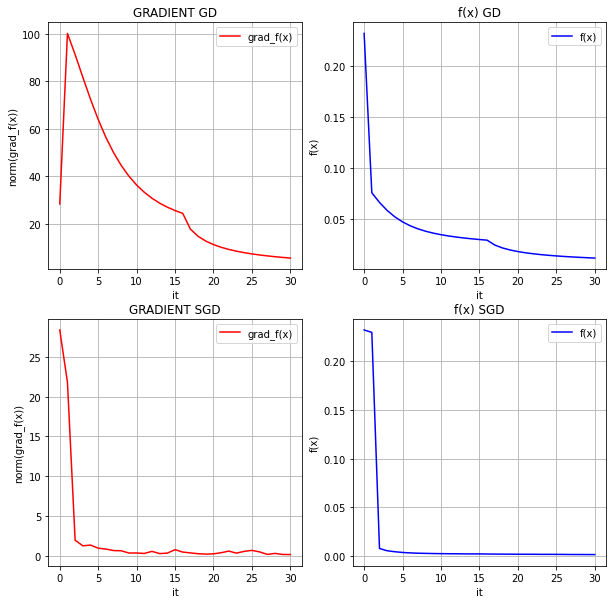

In [52]:
s=[[3,4],[5,6],[1,7],[0,9]]
for i in s:
    print('DIGITS '+str(i[0])+' and '+str(i[1]))
    Xs,Ys = subset(X,Y,i)
    d,N = Xs.shape
    Xs,Ys,Xt_s,Yt_s = TrainSample(Xs,Ys,N//2)
    Ys = Ys.reshape(Ys.size,1)
    Yt_s = Yt_s.reshape(Yt_s.size,1)
    d,N = Xs.shape
    Y01 = np.zeros(Ys.shape)
    Yt_01 = np.zeros(Yt_s.shape)
    for j in range(len(Ys)):
        if Ys[j]==i[1]:
            Y01[j]=1

    for j in range(len(Yt_s)):
        if Yt_s[j]==i[1]:
            Yt_01[j]=1


    wGD,w_valGD,f_valGD,gGD,kGD,norm_gGD = GD2(Xs,Y01,np.ones((d+1,1))*1e-4, 0.001, 0, 30)
    w_valSGD,f_valSGD,gSGD = SGD(l,grad_l,np.ones((d+1,1))*1e-4,Xs,Y01,N//10, 30,alpha=1e-4)

    YpredictGD = Predict(Xt_s,wGD)
    print('Accuracy GD:', Accuracy(YpredictGD,Yt_01),'%')
    print('Ypredict=',YpredictGD)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(np.arange(0,len(norm_gGD)),norm_gGD,'-',c='red',label='grad_f(x)')
    plt.title('GRADIENT GD')
    plt.xlabel('it')
    plt.ylabel('norm(grad_f(x))')
    plt.grid()
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(np.arange(0,len(f_valGD)),f_valGD,'-',c='blue',label='f(x)')
    plt.title('f(x) GD')
    plt.xlabel('it')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()

    YpredictSGD = Predict(Xt_s,w_valSGD[:,-1])
    print('Accuracy:', Accuracy(YpredictSGD,Yt_01),'%')
    print('Ypredict=',YpredictSGD)
    nor = np.linalg.norm(gSGD,axis=0)
    plt.subplot(2,2,3)
    plt.plot(np.arange(0,len(nor)),nor,'-',c='red',label='grad_f(x)')
    plt.title('GRADIENT SGD')
    plt.xlabel('it')
    plt.ylabel('norm(grad_f(x))')
    plt.grid()
    plt.legend()

    plt.subplot(2,2,4)
    plt.plot(np.arange(0,len(f_valSGD)),f_valSGD,'-',c='blue',label='f(x)')
    plt.title('f(x) SGD')
    plt.xlabel('it')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()
    plt.show()

In [53]:
print(w_valSGD)


[[1.00000000e-04 9.86570351e-05 1.04382340e-04 ... 9.90610722e-05
  9.90512552e-05 9.90337051e-05]
 [1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 1.00000000e-04
  1.00000000e-04 1.00000000e-04]
 [1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 1.00000000e-04
  1.00000000e-04 1.00000000e-04]
 ...
 [1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 1.00000000e-04
  1.00000000e-04 1.00000000e-04]
 [1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 1.00000000e-04
  1.00000000e-04 1.00000000e-04]
 [1.00000000e-04 1.00000000e-04 1.00000000e-04 ... 1.00000000e-04
  1.00000000e-04 1.00000000e-04]]
